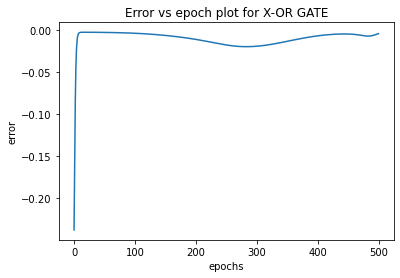

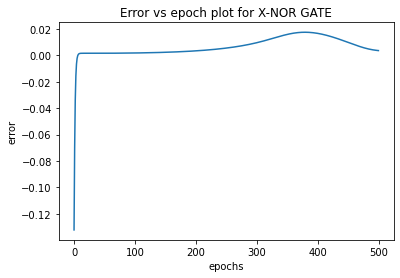

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import sys

def sigmoid (x):
    return 1/(1 + np.exp(-x))

def sigmoid_der(x):
    return x * (1 - x)


X_XOR = np.array([[0, 0], [0, 1],[1, 0],[1, 1]])
X_XNOR = np.array([[0, 0], [0, 1],[1, 0],[1, 1]])

Y_XOR = np.array([ [0], [1],[1], [0]])
Y_XNOR = np.array([ [1], [0],[0], [1]])



epochs = 500
inputLayerNeurons=2
hiddenLayerNeurons=2
outputLayerNeurons =1

#Random weights and bias initialization

Wh_XOR = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))
Wh_XNOR = np.random.uniform(size=(inputLayerNeurons,hiddenLayerNeurons))

Bh_XOR =np.random.uniform(size=(1,hiddenLayerNeurons))
Bh_XNOR =np.random.uniform(size=(1,hiddenLayerNeurons))

Wo_XOR = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))
Wo_XNOR = np.random.uniform(size=(hiddenLayerNeurons,outputLayerNeurons))

Bo_XOR = np.random.uniform(size=(1,outputLayerNeurons))
Bo_XNOR = np.random.uniform(size=(1,outputLayerNeurons))




E_XOR=[]
E_XNOR=[]

for i in range(1,501):
    a1_XOR=X_XOR                     #(4,2)
    a1_XNOR=X_XNOR 
    
    z2_XOR=np.dot(a1_XOR,Wh_XOR)+Bh_XOR      #(4,2)
    z2_XNOR=np.dot(a1_XNOR,Wh_XNOR)+Bh_XNOR 
    
    a2_XOR=sigmoid(z2_XOR)           #(4,2)
    a2_XNOR=sigmoid(z2_XNOR)
    
    z3_XOR =np.dot(a2_XOR, Wo_XOR)+Bo_XOR      #(4,1)
    z3_XNOR =np.dot(a2_XNOR, Wo_XNOR)+Bo_XNOR 
    
    a3_XOR=sigmoid(z3_XOR)             #(4,1)
    a3_XNOR=sigmoid(z3_XNOR)
    
    #Backward propagation
    
    #Errorofoutputlayer
    error_XOR=(Y_XOR-a3_XOR)                      #(4,1)
    error_XNOR=(Y_XNOR-a3_XNOR) 
    
    delta_output_XOR=error_XOR*sigmoid_der(a3_XOR)#(4,1)
    delta_output_XNOR=error_XNOR*sigmoid_der(a3_XNOR)
    
    output_update_XOR=np.dot(a2_XOR.T,delta_output_XOR)#(2,1)
    output_update_XNOR=np.dot(a2_XNOR.T,delta_output_XNOR)
    
    #Errorofhiddenlayer
    error_h_XOR=np.dot(delta_output_XOR,Wo_XOR.T) #(4,2)
    error_h_XNOR=np.dot(delta_output_XNOR,Wo_XNOR.T)
    
    delta_hidden_XOR=error_h_XOR*sigmoid_der(a2_XOR)#(4,2)
    delta_hidden_XNOR=error_h_XNOR*sigmoid_der(a2_XNOR)
    
    hidden_update_XOR=np.dot(a1_XOR.T,delta_hidden_XOR)#(2,2)
    hidden_update_XNOR=np.dot(a1_XNOR.T,delta_hidden_XNOR)
    
    #Updateweightsandbiasofoutputlayer
    Wo_XOR=Wo_XOR+output_update_XOR               #learningratio#(2,1)
    Wo_XNOR=Wo_XNOR+output_update_XNOR 
    
    Bo_XOR=Bo_XOR+sum(delta_output_XOR)#learningratio#(1,1)
    Bo_XNOR=Bo_XNOR+sum(delta_output_XNOR)
    
    
    #Update weights and biasofhiddenlayer
    Wh_XOR=Wh_XOR+hidden_update_XOR#learningratio#(2,2)
    Wh_XNOR=Wh_XNOR+hidden_update_XNOR
    
    Bh_XOR=Bh_XOR+sum(delta_hidden_XOR)#learningratio#(1,2)
    Bh_XNOR=Bh_XNOR+sum(delta_hidden_XNOR)
    
    E_XOR.append(error_XOR.mean(0))
    E_XNOR.append(error_XNOR.mean(0))
    
plt.title("Error vs epoch plot for X-OR GATE")
plt.plot(range(500), E_XOR)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

plt.title("Error vs epoch plot for X-NOR GATE")
plt.plot(range(500), E_XNOR)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()
    
